# **Netflix Movies and TV Shows 2021**
**Complete Exploratory Data Analysis**

# About Dataset

## **Context**
This is my first dataset on Kaggle. I had great fun creating this dataset and learned a ton. If found useful, please upvote.

![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)

---

## **Content**
This dataset contains all the listed movies and TV shows on Netflix as of 2021. The dataset was collected from Flixable, a third-party Netflix search engine.

---

## **Acknowledgements**
Firstly, I would like to thank **Shivamb**, as a similar dataset for Netflix content was available. There were two shortcomings with the previously available database:
1. It was from the year 2019.
2. (Which is the more important part) IMDb ratings for the movies and TV shows were missing. This is a very important feature, especially when it comes to building recommendation algorithms.

---

## **Inspiration**
This dataset can be used to perform the following:
- **EDA** (Exploratory Data Analysis)
- **Data Visualization**
- **Building a Recommendation Algorithm**
- and many more…

---

## **Dataset Link**
[Netflix Movies and TV Shows Dataset on Kaggle](https://www.kaggle.com/datasets/satpreetmakhija/netflix-movies-and-tv-shows-2021/data)


# Importing Libiraries

In [1]:
import pandas as pd #type:ignore
import numpy as np #type:ignore
import seaborn as sns #type:ignore
import matplotlib.pyplot as plt #type:ignore
%matplotlib inline 

from sklearn.impute import SimpleImputer,KNNImputer #type:ignore

# Load the Data Sets
↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv('../DataSets/netflixData.csv')

In [3]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


- let's see the exact column names which can be easily copied later on from Laptop Prices Dataset

In [5]:
df.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

- let's see the exact shaped which can be easily copied later on from Laptop Prices Dataset

In [6]:
df.shape

(5967, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.2+ KB


# **Observations**
---
1. There are 5967 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.


- We need to confirm if the values in the `Imbd Score` column are convert to numeric 

In [8]:
# Make Function to convert to Numeric
def convert_to_numeric(data):
    if isinstance(data,str):
        return float(data.split('/')[0])
    return data

In [9]:
df['Imdb Score'] = df['Imdb Score'].apply(convert_to_numeric)

###  **Descriptive Statistics**

In [10]:
df.describe()

,Release Date,Imdb Score
count,5964.000000,5359.000000
mean,2015.643863,6.558985
std,7.257391,1.173941
min,1925.000000,1.300000
25%,2015.000000,5.900000
50%,2018.000000,6.700000
75%,2019.000000,7.400000
max,2021.000000,9.400000


## **Remove Unnecessary Columns for EDA**


In [11]:
df = df.drop(['Show Id','Date Added', 'Description'], axis = 1)

## Overview
When performing exploratory data analysis (EDA) on the Netflix dataset, it is essential to remove unnecessary columns to focus on the data that will provide valuable insights. Below is a review of the columns and recommendations on which to keep and which to remove.

## Column Review

| Column Name            | Importance for EDA                                      | Recommendation            |
|-----------------------|--------------------------------------------------------|----------------------------|
| Show Id               | Unique identifier for each entry.                      | **Remove**                 |
| Title                 | Essential for identifying content.                     | **Keep**                   |
| Description           | Helpful for understanding context and themes.          | **Remove (if not doing NLP)** |
| Director              | Important for analyzing content by director.           | **Keep**                   |
| Genres                | Critical for understanding content categorization.     | **Keep**                   |
| Cast                  | Important for analyzing cast popularity and trends.    | **Keep**                   |
| Production Country     | Useful for geographical analysis.                      | **Keep**                   |
| Release Date          | Important for time-based analysis.                     | **Keep**                   |
| Rating                | Essential for understanding audience reception.        | **Keep**                   |
| Duration              | Relevant for analyzing content length.                 | **Keep**                   |
| Imdb Score            | Important for quality assessment and recommendations.   | **Keep**                   |
| Content Type          | Necessary for differentiating between movies and TV shows. | **Keep**                |
| Date Added            | Useful for understanding content availability over time.| **Remove (unless analyzing trends)** |

## Summary
Based on the review, it is recommended to remove the following columns for EDA:
- **Show Id**
- **Description** (if not performing NLP)
- **Date Added** (unless analyzing trends)

The remaining columns will provide more meaningful insights during the analysis.


- Remaining Columns

In [12]:
df.columns

Index(['Title', 'Director', 'Genres', 'Cast', 'Production Country',
       'Release Date', 'Rating', 'Duration', 'Imdb Score', 'Content Type'],
      dtype='object')

## **Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

In [13]:
df.isnull().sum().sort_values(ascending=False)

Director              2064
Imdb Score             608
Production Country     559
Cast                   530
Rating                   4
Release Date             3
Duration                 3
Title                    0
Genres                   0
Content Type             0
dtype: int64

In [14]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=True)

Title                  0.000000
Genres                 0.000000
Content Type           0.000000
Release Date           0.050277
Duration               0.050277
Rating                 0.067035
Cast                   8.882185
Production Country     9.368192
Imdb Score            10.189375
Director              34.590246
dtype: float64

- Lets plots a missing values in the graph

<Axes: >

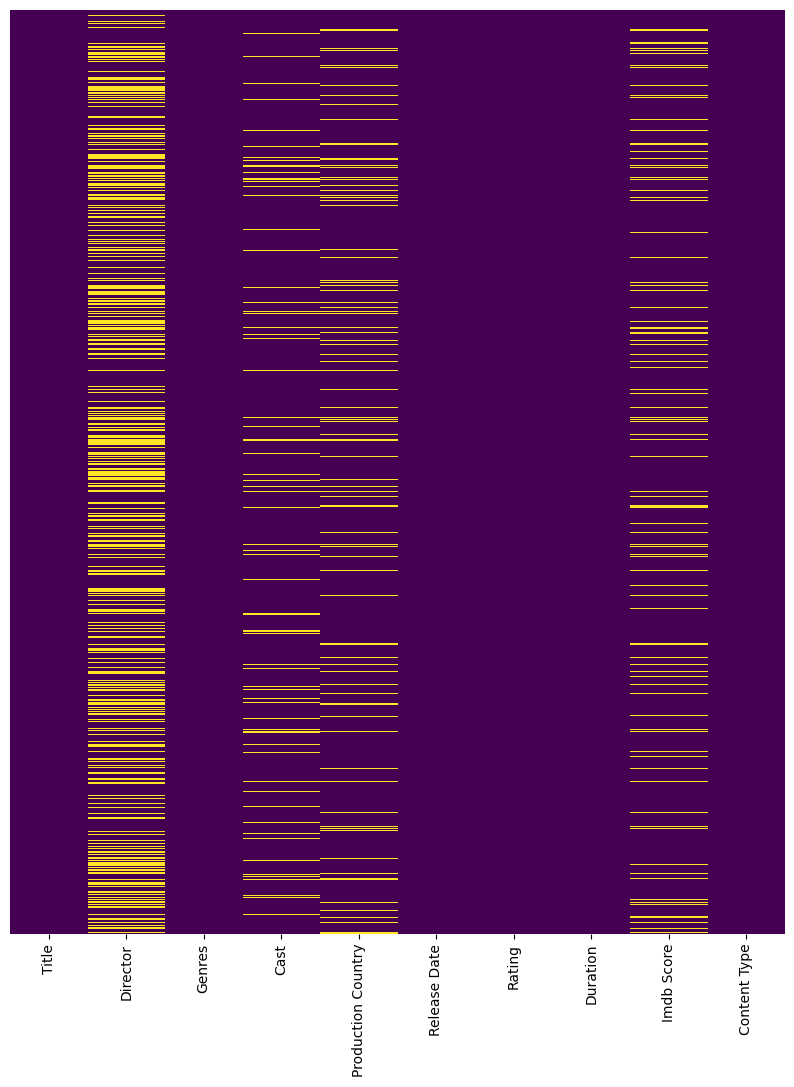

In [15]:
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

-  Lets Plot missing value according to percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

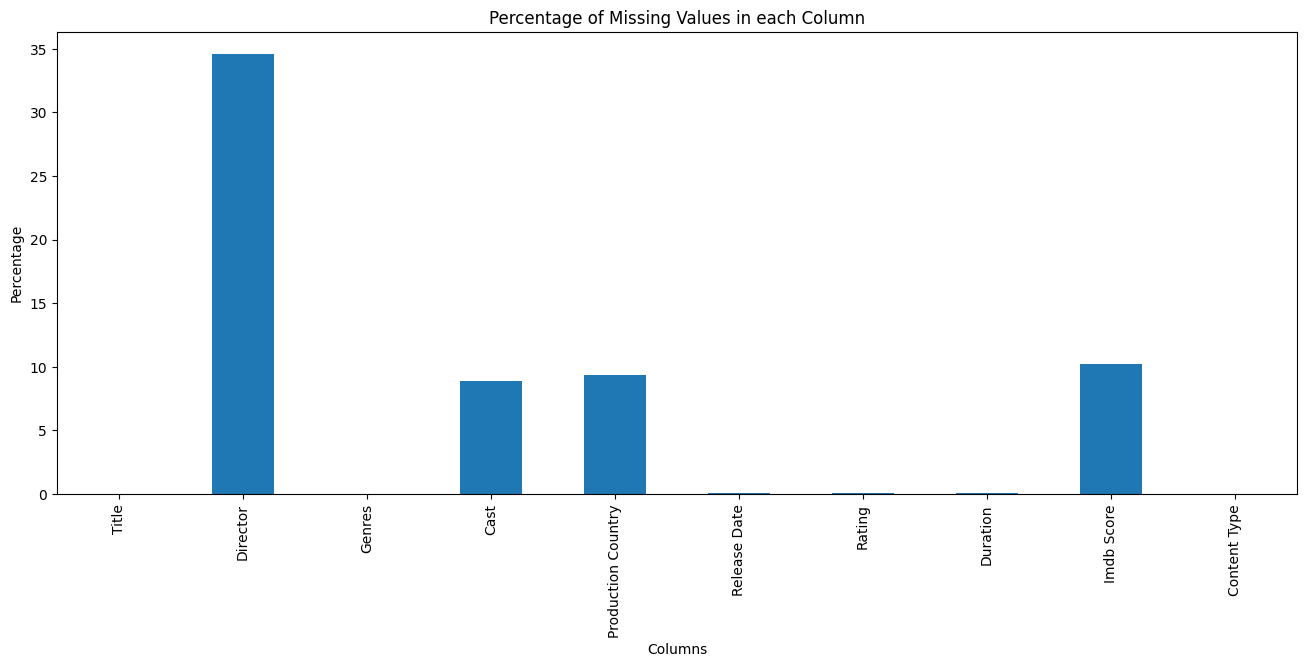

In [16]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [17]:
df.isnull().sum().sort_values(ascending=False)

Director              2064
Imdb Score             608
Production Country     559
Cast                   530
Rating                   4
Release Date             3
Duration                 3
Title                    0
Genres                   0
Content Type             0
dtype: int64

- First Remove the null value from `Director` Columns

In [18]:
director_counts = df['Director'].value_counts()

# Display the unique values and their respective counts
for director, count in director_counts.items():
    print(f'{director}: {count}')

Raúl Campos, Jan Suter: 18
Marcus Raboy: 16
Suhas Kadav: 15
Jay Karas: 14
Youssef Chahine: 12
Cathy Garcia-Molina: 12
Jay Chapman: 11
Lance Bangs: 8
Don Michael Paul: 8
Fernando Ayllón: 8
Ryan Polito: 8
Kunle Afolayan: 8
Johnnie To: 7
Yılmaz Erdoğan: 7
S.S. Rajamouli: 7
Justin G. Dyck: 7
Hidenori Inoue: 7
Mae Czarina Cruz: 7
Troy Miller: 7
Omoni Oboli: 7
Joey So: 6
Matt Askem: 6
Shannon Hartman: 6
Martin Scorsese: 6
Ashutosh Gowariker: 6
Mike Clattenburg: 5
Hanung Bramantyo: 5
Vishal Bhardwaj: 5
Rajiv Mehra: 5
Leslie Small: 5
Antoinette Jadaone: 5
Imtiaz Ali: 5
Wilson Yip: 5
Poj Arnon: 5
Rocky Soraya: 5
Detlev Buck: 5
Umesh Mehra: 5
McG: 5
Niyi Akinmolayan: 5
Michael Simon: 5
Manny Rodriguez: 5
Sudhir Mishra: 4
Oliver Stone: 4
Savage Steve Holland: 4
Hakan Algül: 4
Kıvanç Baruönü: 4
Stan Lathan: 4
Jun Lana: 4
Ozan Açıktan: 4
Ahishor Solomon: 4
Wong Jing: 4
Vince Marcello: 4
Lucas Margutti: 4
Anurag Kashyap: 4
Ava DuVernay: 4
Hernán Zin: 4
Philippe Aractingi: 4
Paul Thomas Anderson: 4
F

In [19]:
# Remove the null value by using simple imputer 
imputer = SimpleImputer(strategy='most_frequent')
df['Director'] = imputer.fit_transform(df[['Director']]).ravel()

In [20]:
df.head()

,Title,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type
0,(Un)Well,"Raúl Campos, Jan Suter",Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6,TV Show
1,#Alive,Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2,Movie
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4,Movie
3,#blackAF,"Raúl Campos, Jan Suter",TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6,TV Show
4,#cats_the_mewvie,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1,Movie


In [21]:
df.isnull().sum().sort_values(ascending=False)

Imdb Score            608
Production Country    559
Cast                  530
Rating                  4
Release Date            3
Duration                3
Title                   0
Director                0
Genres                  0
Content Type            0
dtype: int64

- Now, Remove the null value from `Imbd Score` Columns

In [22]:
df['Imdb Score'].value_counts()

Imdb Score
7.1    233
6.6    203
6.4    200
7.3    193
6.5    191
7.0    186
7.4    184
7.2    181
6.7    176
7.5    169
6.9    163
6.3    161
6.0    159
6.8    152
7.6    144
6.1    142
5.9    140
8.0    134
7.7    130
6.2    130
5.8    119
7.8    117
5.5    117
5.4    113
5.6    105
5.7    102
8.1     94
5.3     89
7.9     80
8.2     76
8.3     71
4.9     64
5.2     63
5.0     62
5.1     62
8.4     57
8.5     53
4.7     49
4.5     44
4.6     42
8.6     40
4.8     37
4.4     36
4.3     32
8.7     23
8.8     20
4.2     19
3.8     18
3.9     17
4.1     16
4.0     15
3.5     14
3.4     12
3.3     11
3.7     11
3.6     10
8.9      9
3.2      8
9.0      7
3.0      6
3.1      6
2.6      5
2.5      5
2.8      4
2.9      4
9.2      3
2.3      3
2.4      3
9.1      3
1.9      2
2.2      2
1.8      1
2.1      1
2.7      1
2.0      1
9.4      1
9.3      1
1.3      1
1.7      1
Name: count, dtype: int64

In [23]:
# KNN Imputer use
imputer = KNNImputer(n_neighbors=5)
df['Imdb Score'] = imputer.fit_transform(df[['Imdb Score']])

- Now, Remove the null value from `Production Country` Columns

In [24]:
df['Production Country'].value_counts()

Production Country
United States                                                                          1792
India                                                                                   628
United Kingdom                                                                          244
Japan                                                                                   221
South Korea                                                                             167
Spain                                                                                   129
Canada                                                                                  107
France                                                                                   95
Nigeria                                                                                  86
Mexico                                                                                   82
Turkey                                                       

In [25]:
df['Production Country'] = df['Production Country'].fillna(df['Production Country'].mode()[0])

- Now, Remove the null value from `Cast` Columns

In [26]:
df['Cast'] = df['Cast'].fillna(df['Cast'].mode()[0])

- Now, Remove the null value from `Rating` Columns

In [27]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

- Now, Remove the null value from `Release Date` Columns

In [28]:
df['Release Date'] = df['Release Date'].fillna(df['Release Date'].mode()[0])


- Now, Remove the null value from `Duration` Columns

In [29]:
df['Duration'] = df['Duration'].fillna(df['Duration'].mode()[0])


- Completing Remove Null Values

In [30]:
df.isnull().sum().sort_values(ascending=False)

Title                 0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
dtype: int64

In [31]:
df.columns

Index(['Title', 'Director', 'Genres', 'Cast', 'Production Country',
       'Release Date', 'Rating', 'Duration', 'Imdb Score', 'Content Type'],
      dtype='object')

In [32]:
df.describe()

,Release Date,Imdb Score
count,5967.000000,5967.000000
mean,2015.645551,6.558985
std,7.255956,1.112516
min,1925.000000,1.300000
25%,2015.000000,6.000000
50%,2018.000000,6.558985
75%,2019.000000,7.300000
max,2021.000000,9.400000


In [33]:
numeric_col = df[['Release Date','Imdb Score']]

In [34]:
# Compute the correlation matrix
correlation_matrix = numeric_col.corr()

# Display the correlation matrix
print(correlation_matrix)


              Release Date  Imdb Score
Release Date      1.000000   -0.046513
Imdb Score       -0.046513    1.000000


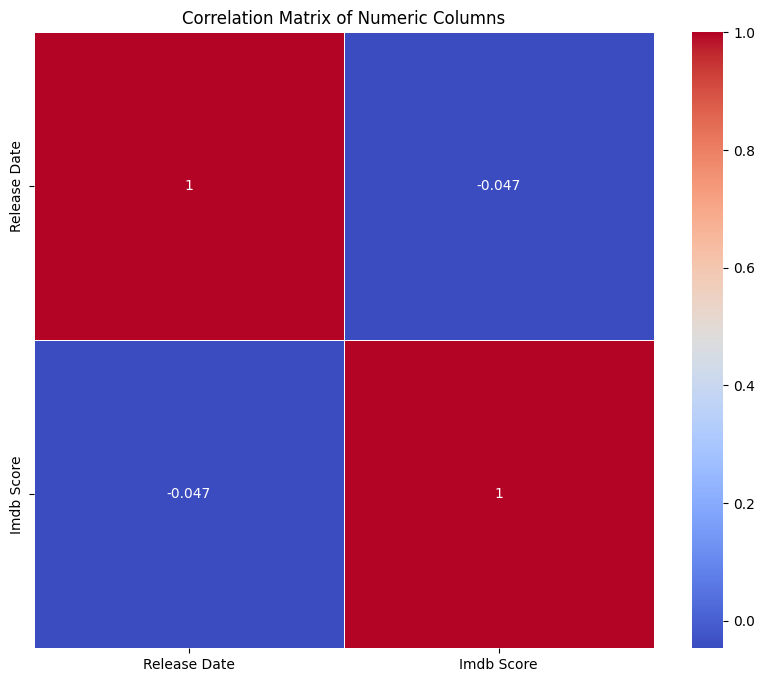

In [35]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()
